In [1]:
! pip install tensorflow

In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# URLs of the datasets
dataset_urls = [
    "https://raw.githubusercontent.com/AdTekDev/EmT.DS/main/EmT%20Test%2001/Set_Y.zip",
]

data_dirs = []
for url in dataset_urls:
    data_dir = tf.keras.utils.get_file(origin=url, extract=True)
    data_dirs.append(pathlib.Path(data_dir).with_suffix(''))

# Print out the data directories
print(data_dirs)

9970264/9970264 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[WindowsPath('C:/Users/tranh/.keras/datasets/Set_Y')]


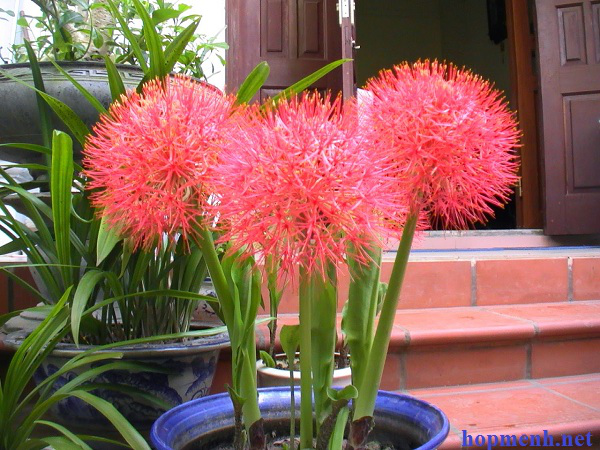

In [4]:
flowers = list(data_dirs[0].glob('Train/*/*'))
PIL.Image.open(str(flowers[0]))

In [5]:
train_data_dir = data_dirs[0]  # Use Set_X for training

# Verify the structure
train_image_count = len(list(train_data_dir.glob('Train/*/*.jpg')))
print(f'Training images: {train_image_count}')

Training images: 57


In [6]:
batch_size = 8
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir.joinpath("Train"),
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 57 files belonging to 6 classes.
Using 46 files for training.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir.joinpath("Train"),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 57 files belonging to 6 classes.


Using 11 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['12 - Hong tu cau', '13 - Hoa oi', '16 - Hoa ban', '19 - Hoa Phao Bong', '20 - Hoa long den', '6 - Hoa do quyen']


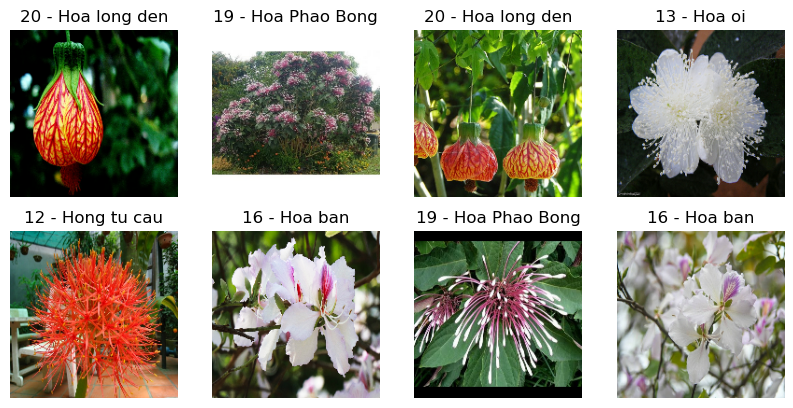

In [10]:
import matplotlib.pyplot as plt
class_names_y = test_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(batch_size):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_y[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [12]:
# Data augmentation layer
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

In [13]:
normalization_layer = layers.Rescaling(1.0/255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

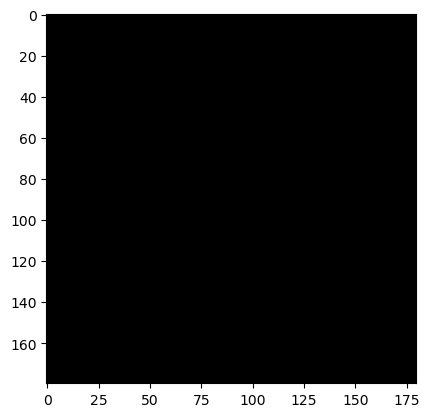

In [15]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.show()

In [16]:
image_batch.shape, labels_batch.shape

(TensorShape([8, 180, 180, 3]), TensorShape([8]))

In [17]:
num_classes = len(class_names)
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(num_classes)
])

c:\Users\tranh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir.joinpath("Train"),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 57 files belonging to 6 classes.
Using 11 files for validation.


In [96]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
9/9 [==============================] - 30s 3s/step - loss: 2.0209 - accuracy: 0.0857 - val_loss: 1.7980 - val_accuracy: 0.1765
Epoch 2/50
9/9 [==============================] - 30s 3s/step - loss: 1.7481 - accuracy: 0.2714 - val_loss: 1.7761 - val_accuracy: 0.2941
Epoch 3/50
9/9 [==============================] - 29s 3s/step - loss: 1.6977 - accuracy: 0.3000 - val_loss: 1.7855 - val_accuracy: 0.1765
Epoch 4/50
9/9 [==============================] - 30s 3s/step - loss: 1.5755 - accuracy: 0.4000 - val_loss: 1.7209 - val_accuracy: 0.1176
Epoch 5/50
9/9 [==============================] - 28s 3s/step - loss: 1.4106 - accuracy: 0.4714 - val_loss: 1.7103 - val_accuracy: 0.2353
Epoch 6/50
9/9 [==============================] - 29s 3s/step - loss: 1.3794 - accuracy: 0.4714 - val_loss: 1.4333 - val_accuracy: 0.2941
Epoch 7/50
9/9 [==============================] - 30s 3s/step - loss: 1.2423 - accuracy: 0.5143 - val_loss: 1.3617 - val_accuracy: 0.4706
Epoch 8/50
9/9 [==================

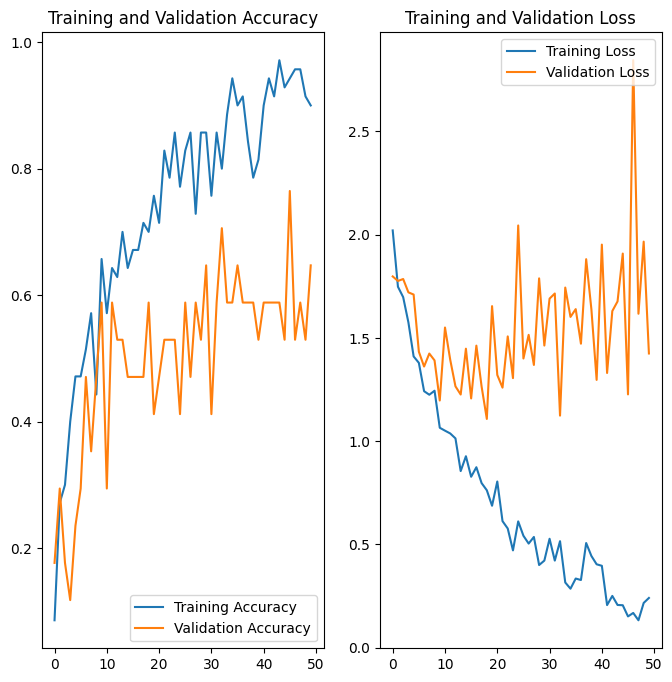

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
# prompt: fix it:testlist = list(data_dirs[1].glob('Test/*.jpg'))
# print(testlist[0])

test_images = list(train_data_dir.joinpath("Test").glob('*.jpg'))
print(test_images[0])


/root/.keras/datasets/Set_Y/Test/16_Hoa ban 011.jpg


/root/.keras/datasets/Set_Y/Test/16_Hoa ban 011.jpg
1/1 [==============================] - 0s 242ms/step


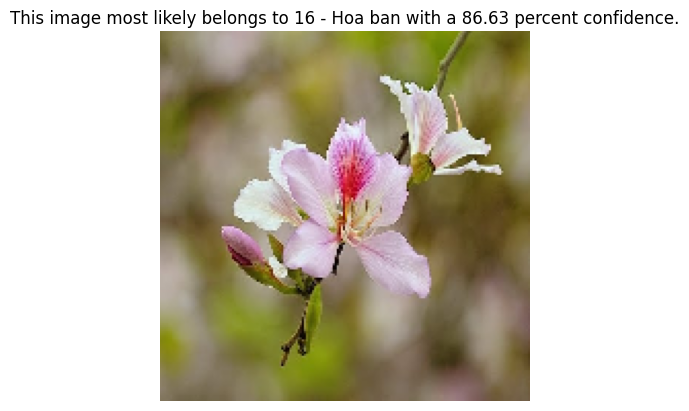

1/1 [==============================] - 0s 124ms/step


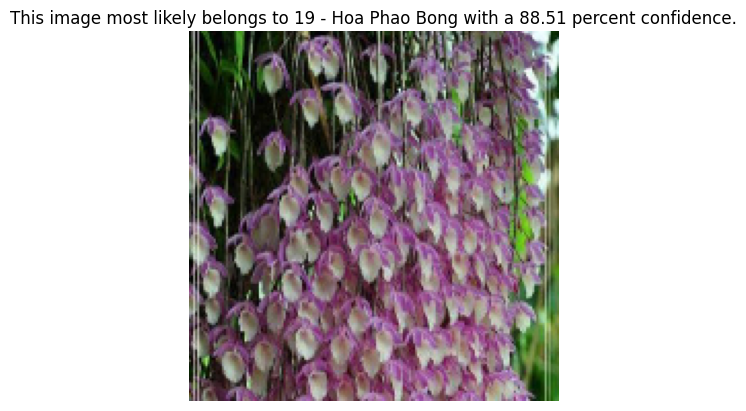

1/1 [==============================] - 0s 111ms/step


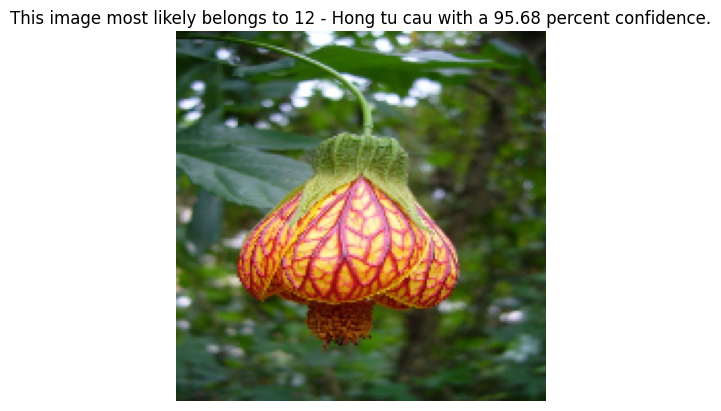

1/1 [==============================] - 0s 98ms/step


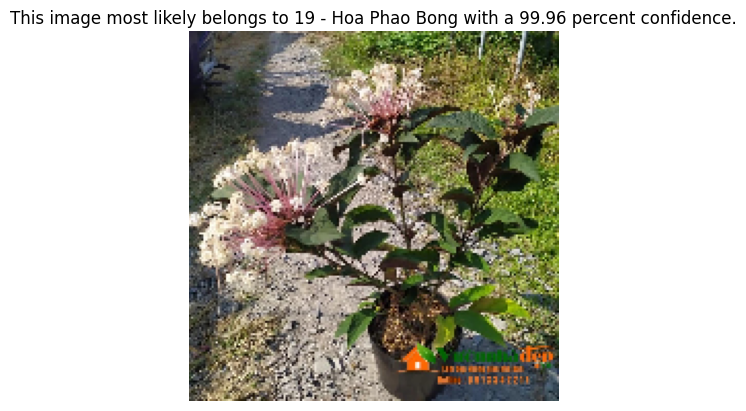

1/1 [==============================] - 0s 100ms/step


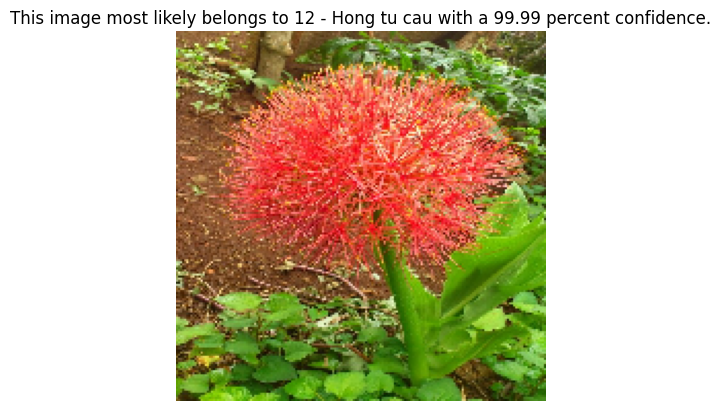

1/1 [==============================] - 0s 157ms/step


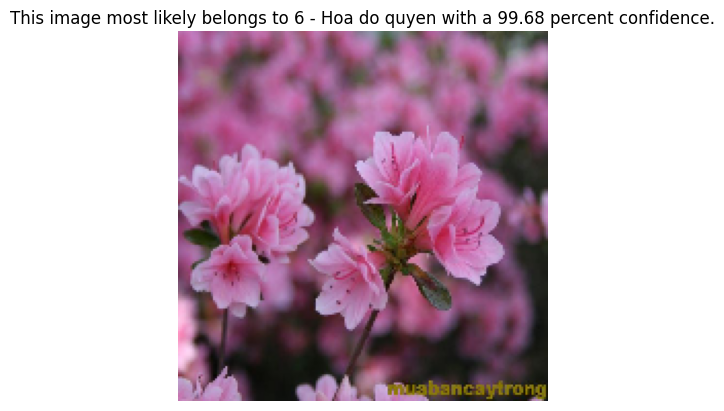

1/1 [==============================] - 0s 99ms/step


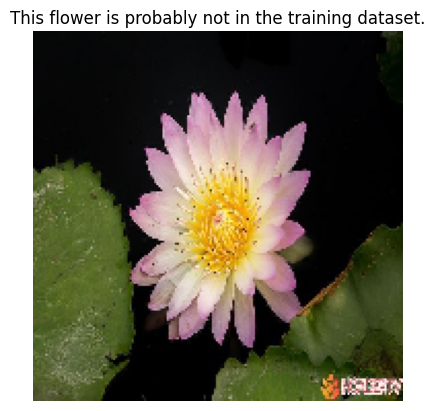

1/1 [==============================] - 0s 108ms/step


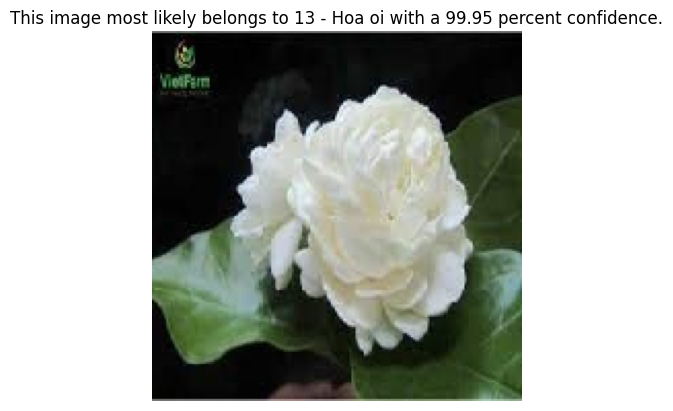

1/1 [==============================] - 0s 174ms/step


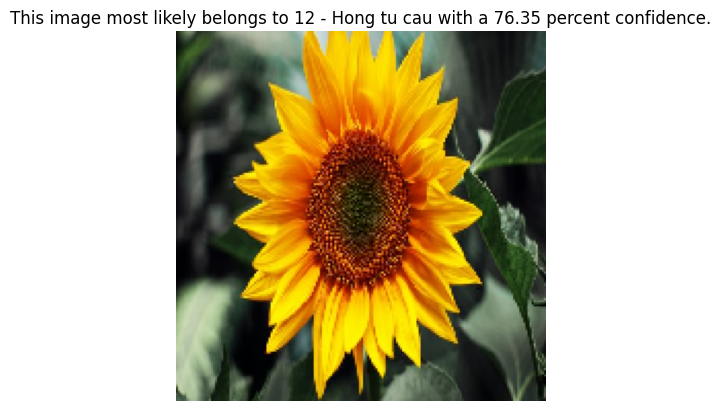

1/1 [==============================] - 0s 207ms/step


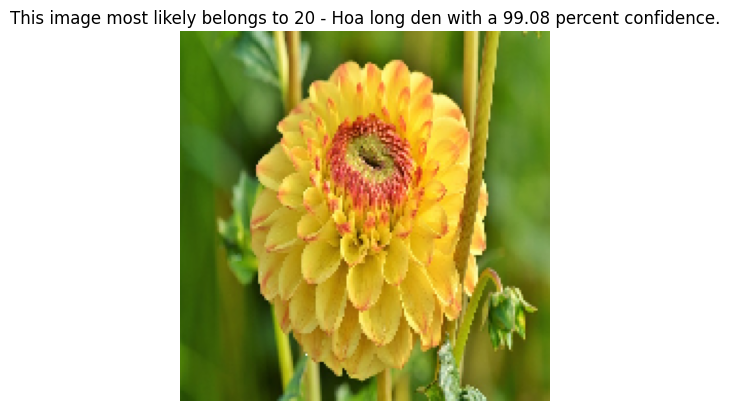

1/1 [==============================] - 0s 205ms/step


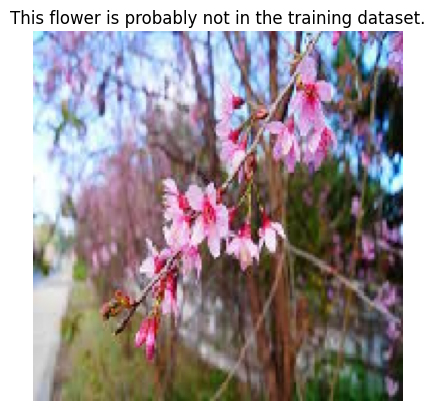

1/1 [==============================] - 0s 179ms/step


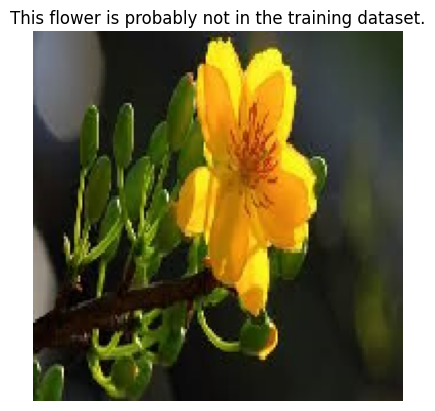

1/1 [==============================] - 0s 193ms/step


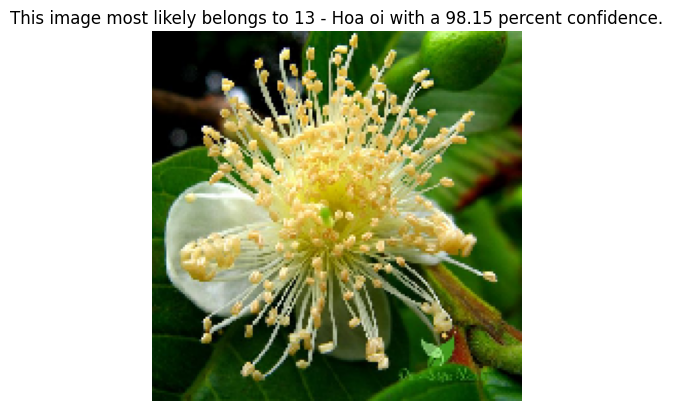

1/1 [==============================] - 0s 226ms/step


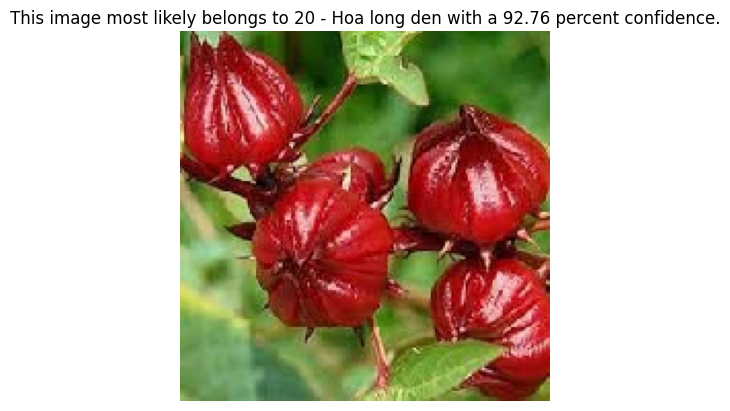

1/1 [==============================] - 0s 124ms/step


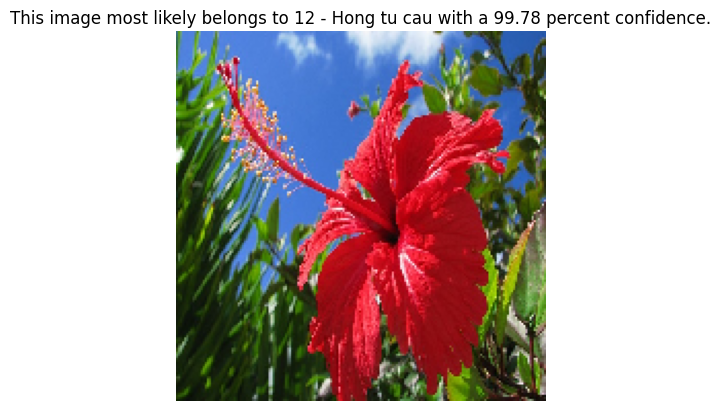

1/1 [==============================] - 0s 156ms/step


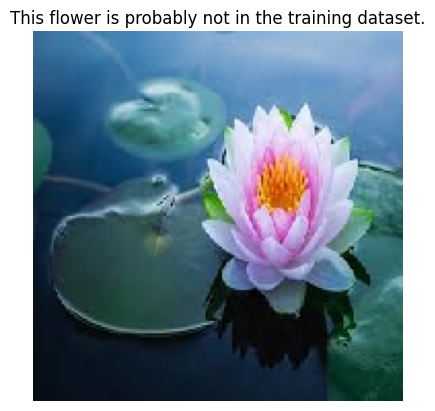

1/1 [==============================] - 0s 140ms/step


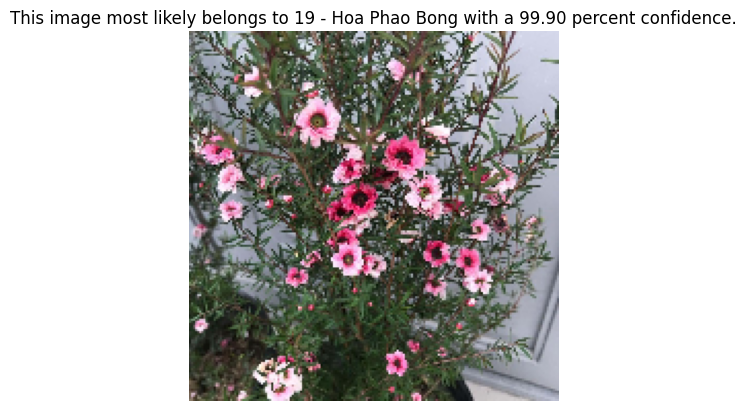

1/1 [==============================] - 0s 140ms/step


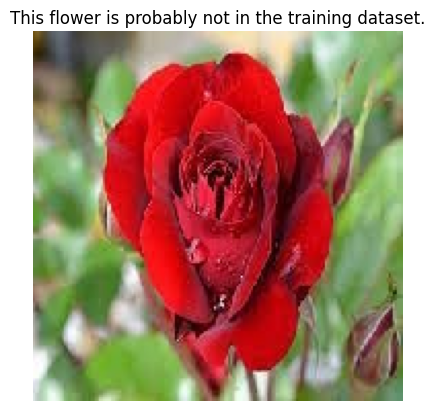

1/1 [==============================] - 0s 171ms/step


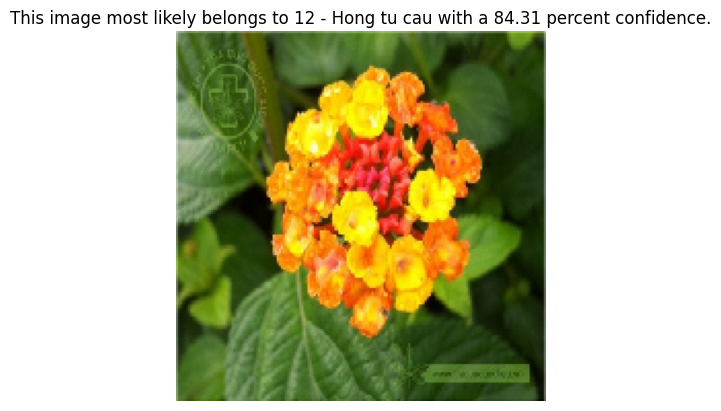

1/1 [==============================] - 0s 124ms/step


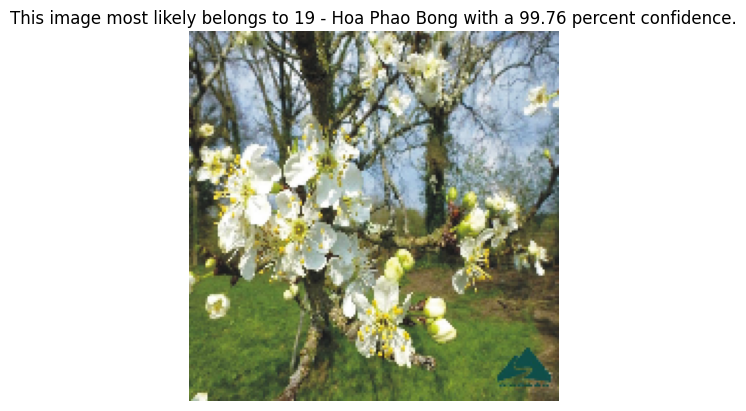

In [101]:
# Test Image Handling and Predictions
test_images = list(train_data_dir.joinpath("Test").glob('*.jpg'))
print(test_images[0])

for i in range(min(20, len(test_images))):  # Ensure we don't exceed the number of available test images
    img_path = test_images[i]

    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    confidence = 100 * np.max(score)
    predicted_class = class_names[np.argmax(score)]

    plt.figure()
    plt.imshow(img)
    plt.axis('off')

    if confidence < 70:
        plt.title("This flower is probably not in the training dataset.")
    else:
        plt.title(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")

    plt.show()